## The Most Environmentally Friendly Neighborhood

By: Ruchi, Dailynn, Le Lin

## Introduction: This project is to find out the most environmentally friendly neighborhood. We use three different metric and the area data to get our ratio. Finally merge and compare those to find out the best neighborhood in Pittsburgh.

## Metrics: 1.The ratio of numbers of smart trashcans.2. The ratio of the frequency of fire incidents.3. The ratio of the cleaned up area in Pittsburgh.

### 1.Imported all the datas we need to use

In [6]:
# imported in necessary libraries and read .csv files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from geopandas import GeoDataFrame
cans = pd.read_csv('PittsburghSmartTrash.csv')
neighborhood = pd.read_csv('neighborhoods.csv')
fire = pd.read_csv('FireIncidents.csv')

FileNotFoundError: [Errno 2] File FireIncidents.csv does not exist: 'FireIncidents.csv'

### 2.Extract the neighborhood names and acres data from the neighborhood dataset.

In [3]:
# uses neighborhood to make a table with just the neighborhood and acres
sortedarea = neighborhood.sort_values(by = "hood")
sortedareadf = sortedarea[['hood','acres']]
newsortedareadf = sortedareadf.reset_index(drop=True)
newsortedareadf

,hood,acres
0,Allegheny Center,134.703
1,Allegheny West,90.841
2,Allentown,189.608
3,Arlington,302.320
4,Arlington Heights,84.592
...,...,...
85,Upper Lawrenceville,260.349
86,West End,128.679
87,West Oakland,138.372
88,Westwood,445.009


### 3. Merge the fire incident data with the neighborhood area data we extracted above

In [4]:
# merged fire to neighborhood dataset to calculate ratio
num = fire['neighborhood'].value_counts().to_frame().rename_axis("hood")
num = num.rename(columns = {"neighborhood": "frequency"})
num = num.merge(sortedareadf, how = "left", left_on = "hood", right_on="hood")
num

NameError: name 'fire' is not defined

### 4.Fixing the infinite/NaN values in the dataset, replace all of them with 0. Then calculate to find the ratio of acres/frequency of fire incidents

In [8]:
# creating ratio column
num["ratio"] = num["acres"] / num["frequency"]
num = num.replace([np.inf, -np.inf, np.NaN], 0)
num

,hood,frequency,acres,ratio
0,Carrick,255,1075.670,4.218314
1,Squirrel Hill South,226,1717.485,7.599491
2,Central Business District,225,411.593,1.829302
3,South Side Flats,220,601.553,2.734332
4,Hazelwood,213,1017.805,4.778427
...,...,...,...,...
86,St. Clair,11,199.285,18.116818
87,East Carnegie,10,277.895,27.789500
88,Mt. Oliver,10,66.226,6.622600
89,Regent Square,7,123.682,17.668857


### 5.Import the shp file to plot the area, merge the fire incident data with it. The area where "most green" is the best neighborhood with greatest ratio (only base on fire incidents ratio)

In [9]:
# merges fire with the neighborhood shape file
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

fire_geo = neighborhoods.merge(num, how='left')
fire_geo

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,frequency,ratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",NaN,NaN
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN,NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",55.0,2.515855
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",89.0,1.866303
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",NaN,NaN
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",18.0,7.148833
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",NaN,NaN
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",19.0,15.431421


In [1]:
# plots the merged fire dataset as a chloropleth map
fire_geo.plot(column='ratio', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Fire Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

NameError: name 'fire_geo' is not defined

### 6. Doing the same steps with smart trash cans data

In [11]:
# this table refers to the smart trash cans 
total = cans['neighborhood'].value_counts().to_frame().rename_axis("hood")
total = total.rename(columns = {"neighborhood": "frequency"})
total = total.merge(sortedareadf, how = "left", left_on = "hood", right_on="hood")
total

,hood,frequency,acres
0,Shadyside,77,592.104
1,East Liberty,68,373.650
2,Squirrel Hill South,64,1717.485
3,Bloomfield,59,451.405
4,South Side Flats,56,601.553
...,...,...,...
74,Northview Heights,1,201.558
75,Oakwood,1,162.015
76,South Shore,1,136.201
77,Bedford Dwellings,1,115.252


In [19]:
# creating ratio column
total["ratio"] = total["frequency"] / total["acres"]
total = total.replace([np.inf, -np.inf, np.NaN], 0)
total

,hood,frequency,acres,ratio
0,Shadyside,77,592.104,0.130045
1,East Liberty,68,373.650,0.181988
2,Squirrel Hill South,64,1717.485,0.037264
3,Bloomfield,59,451.405,0.130703
4,South Side Flats,56,601.553,0.093092
...,...,...,...,...
74,Northview Heights,1,201.558,0.004961
75,Oakwood,1,162.015,0.006172
76,South Shore,1,136.201,0.007342
77,Bedford Dwellings,1,115.252,0.008677


In [20]:
# merging cans with shape file to create cans_geo
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

cans_geo = neighborhoods.merge(total, how='left')
cans_geo

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,frequency,ratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",NaN,NaN
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN,NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",9.0,0.065042
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",22.0,0.132450
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",NaN,NaN
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",9.0,0.069941
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",NaN,NaN
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",NaN,NaN


### where the place is most green is the best neighborhood (base on smart trash cans data)

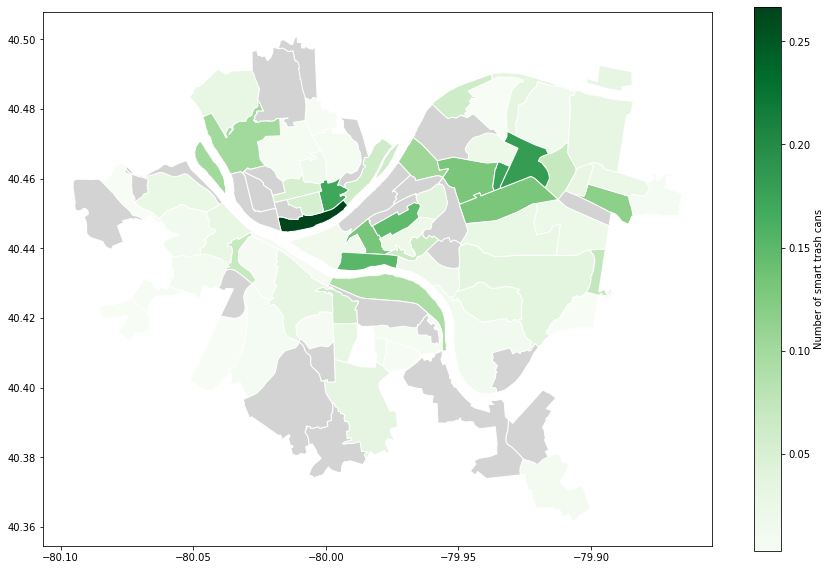

In [21]:
# plotting cans_geo in chloropleth map
cans_geo.plot(column='ratio', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of smart trash cans"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Same steps as above, with the beautify dataset.

In [23]:
# merging beautify and neighborhood
beautify = pd.read_csv('Pittsburgh_Beautify_The_Burgh.csv')
beautify = beautify.groupby('Neighborhood').sum()
beautify['Beautified Area Sq ft'] = beautify['SHAPE_Area']
beautify['Beautified Area Acres'] = beautify['Beautified Area Sq ft'] / 4046.86
beautify['hood'] = beautify.index
beautify = beautify.merge(neighborhood)
beautify['ratios'] = beautify['Beautified Area Acres'] / beautify['acres']
beautify = beautify[['hood','Beautified Area Sq ft','acres','Beautified Area Acres', 'ratios']]
beautify = beautify.replace([np.inf, -np.inf, np.NaN], 0)
beautify

,hood,Beautified Area Sq ft,acres,Beautified Area Acres,ratios
0,Allegheny West,1.915198e+04,90.841,4.732553,0.052097
1,Allentown,1.517427e+04,189.608,3.749641,0.019776
2,Arlington,2.406704e+04,302.320,5.947089,0.019672
3,Beltzhoover,9.549008e+04,270.374,23.596091,0.087272
4,Carrick,1.530361e+04,1075.670,3.781600,0.003516
5,Central Business District,3.905076e+04,411.593,9.649646,0.023445
6,Central Oakland,2.039578e+05,180.883,50.399034,0.278628
7,East Liberty,3.131755e+04,373.650,7.738728,0.020711
8,Elliott,3.386678e+04,389.870,8.368656,0.021465
9,Greenfield,1.575986e+04,497.028,3.894344,0.007835


In [24]:
n = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

beautified_geo = n.merge(beautify, how='left') #merge to beautify dataframe
beautified_geo

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,Beautified Area Sq ft,Beautified Area Acres,ratios
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",NaN,NaN,NaN
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN,NaN,NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",80545.88713,19.903305,0.143839
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",NaN,NaN,NaN
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",NaN,NaN,NaN
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444...",NaN,NaN,NaN
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462...",NaN,NaN,NaN
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",NaN,NaN,NaN


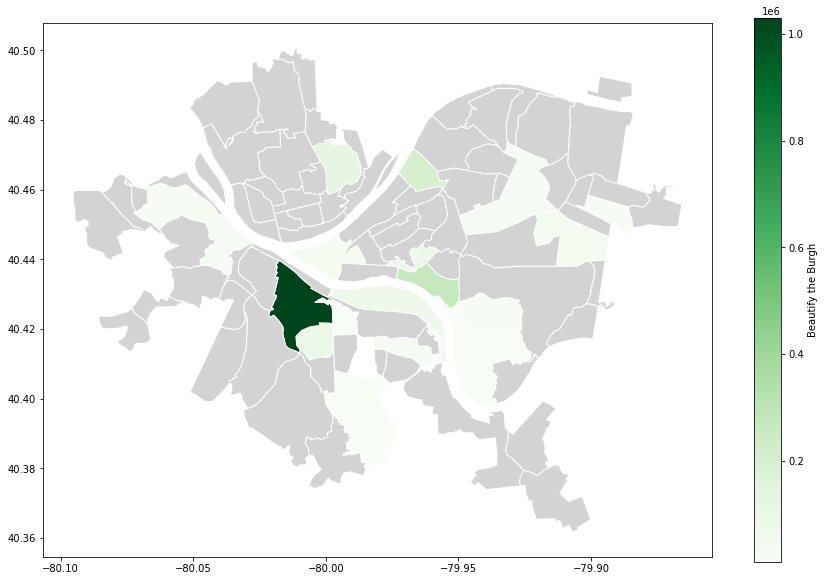

In [25]:
# plot as chloropleth map
beautified_geo.plot(column='Beautified Area Sq ft', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Beautify the Burgh"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Now starting merge all three ratios together. Begin with merge the fire incidents ratio and smash trash cans ratio

In [28]:
# combining both the ratio from the fire incidents and the ratio from the smart trash cans
rt = total.merge(num, how='left', left_on='hood', right_on='hood',suffixes=('cans','fire'))
rt['ratiofire'] = rt['ratiofire'].replace([np.inf, -np.inf, np.NaN], 0)
rt["ratio"] = rt["ratiofire"] + rt["ratiocans"]
rt

,hood,frequencycans,acrescans,ratiocans,frequencyfire,acresfire,ratiofire,ratio
0,Shadyside,77,592.104,0.130045,154,592.104,3.844831,3.974876
1,East Liberty,68,373.650,0.181988,185,373.650,2.019730,2.201718
2,Squirrel Hill South,64,1717.485,0.037264,226,1717.485,7.599491,7.636755
3,Bloomfield,59,451.405,0.130703,146,451.405,3.091815,3.222518
4,South Side Flats,56,601.553,0.093092,220,601.553,2.734332,2.827424
...,...,...,...,...,...,...,...,...
74,Northview Heights,1,201.558,0.004961,60,201.558,3.359300,3.364261
75,Oakwood,1,162.015,0.006172,13,162.015,12.462692,12.468865
76,South Shore,1,136.201,0.007342,21,136.201,6.485762,6.493104
77,Bedford Dwellings,1,115.252,0.008677,38,115.252,3.032947,3.041624


In [29]:
# merges to create fire and cans merged chloropleth map
combo1_geo = neighborhoods.merge(rt, how='left',left_on = 'hood', right_on = 'hood')
combo1_geo.head(20)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,Shape__Are,Shape__Len,geometry,frequencycans,acrescans,ratiocans,frequencyfire,acresfire,ratiofire,ratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",39.0,180.883,0.215609,83.0,180.883,2.179313,2.394922
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",15.0,320.679,0.046776,113.0,320.679,2.837867,2.884643
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",9.0,138.372,0.065042,55.0,138.372,2.515855,2.580897
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",22.0,166.101,0.132450,89.0,166.101,1.866303,1.998753
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",41.0,390.864,0.104896,47.0,390.864,8.316255,8.421151
5,6,6.0,42,003,020100,4,420030201004,Block Group 4,G5030,S,...,1.784591e+07,23034.929056,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",7.0,411.593,0.017007,225.0,411.593,1.829302,1.846309
6,7,7.0,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,1.754340e+07,18197.706073,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",4.0,404.765,0.009882,95.0,404.765,4.260684,4.270566
7,8,8.0,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,2.522418e+07,26390.538103,"POLYGON ((-80.01456 40.47727, -80.01462 40.477...",6.0,581.656,0.010315,148.0,581.656,3.930108,3.940423
8,9,10.0,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,1.223253e+07,20906.829409,"POLYGON ((-80.01087 40.50097, -80.01073 40.499...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,11.0,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,8.727371e+06,13757.331946,"POLYGON ((-80.00327 40.48271, -80.00326 40.482...",1.0,201.558,0.004961,60.0,201.558,3.359300,3.364261


### The map plot with combined datas of smash trash cans and fire incidents.

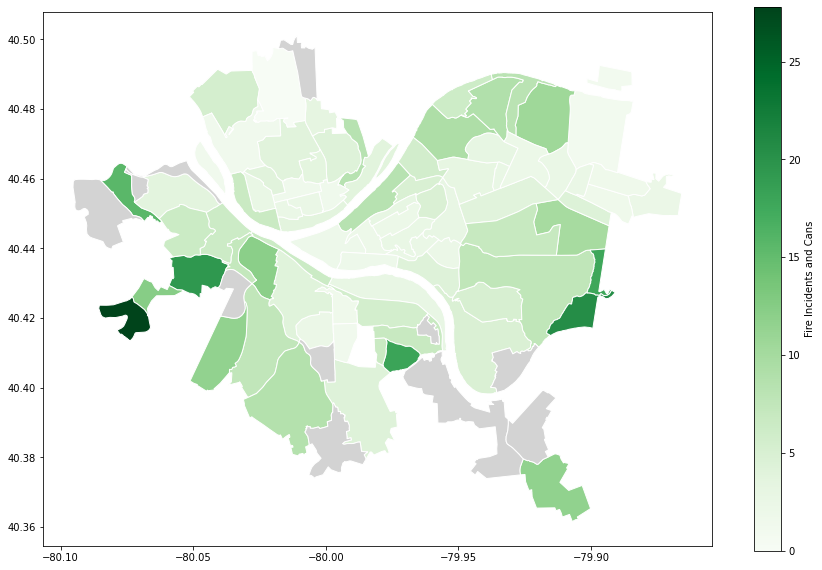

In [30]:
#chloropleth map for one merge
combo1_geo.plot(column='ratio', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Fire Incidents and Cans"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

### Start to merge the third dataset (beautify the pittsburgh) to the combined dataset

In [31]:
# merging with third dataset (beautify the burgh)
y = rt.merge(beautify, how = "left", left_on = "hood", right_on ="hood", suffixes=("ratio","realratio"))
y = y.fillna(0)
y = y.replace([np.inf, -np.inf], np.nan)
y["totalratio"] = y["ratio"] + y["ratios"]
y.head(30)

,hood,frequencycans,acrescans,ratiocans,frequencyfire,acresfire,ratiofire,ratio,Beautified Area Sq ft,acres,Beautified Area Acres,ratios,totalratio
0,Shadyside,77,592.104,0.130045,154,592.104,3.844831,3.974876,2.827719e+04,592.104,6.987439,0.011801,3.986677
1,East Liberty,68,373.650,0.181988,185,373.650,2.019730,2.201718,3.131755e+04,373.650,7.738728,0.020711,2.222429
2,Squirrel Hill South,64,1717.485,0.037264,226,1717.485,7.599491,7.636755,0.000000e+00,0.000,0.000000,0.000000,7.636755
3,Bloomfield,59,451.405,0.130703,146,451.405,3.091815,3.222518,0.000000e+00,0.000,0.000000,0.000000,3.222518
4,South Side Flats,56,601.553,0.093092,220,601.553,2.734332,2.827424,7.128112e+04,601.553,17.613933,0.029281,2.856705
5,North Shore,52,195.014,0.266648,56,195.014,3.482393,3.749040,0.000000e+00,0.000,0.000000,0.000000,3.749040
6,Strip District,41,390.864,0.104896,47,390.864,8.316255,8.421151,1.632250e+05,390.864,40.333736,0.103191,8.524342
7,Central Oakland,39,180.883,0.215609,83,180.883,2.179313,2.394922,2.039578e+05,180.883,50.399034,0.278628,2.673550
8,Carrick,38,1075.670,0.035327,255,1075.670,4.218314,4.253641,1.530361e+04,1075.670,3.781600,0.003516,4.257156
9,Bluff,32,210.510,0.152012,119,210.510,1.768992,1.921003,0.000000e+00,0.000,0.000000,0.000000,1.921003


# total ratio of three metrics

In [47]:
#groups just neighborhood and total ratio
c = y[["hood", "totalratio"]]
c.sort_values("totalratio", ascending = False)

,hood,totalratio
78,East Carnegie,27.793098
73,Swisshelm Park,20.574907
56,Westwood,19.359453
72,St. Clair,18.121836
40,Regent Square,17.741624
...,...,...
14,East Allegheny,1.538097
52,Knoxville,1.350536
27,Marshall-Shadeland,1.346662
54,Lincoln-Lemington-Belmar,1.068400


### Start plot out the best neighborhood on pittsburgh map base on the final combined datasets of three metrics.

In [48]:
# creating variable to read shape file and then merging it with c
neigh = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
combined = neigh.merge(c, how='left', left_on='hood', right_on='hood')
combined = combined.replace([np.inf, -np.inf, np.nan], 0)
# look at the head to confirm it merged correctly
combined.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,totalratio
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",2.673550
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",3.027111
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",2.724736
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",1.998753
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",8.524342


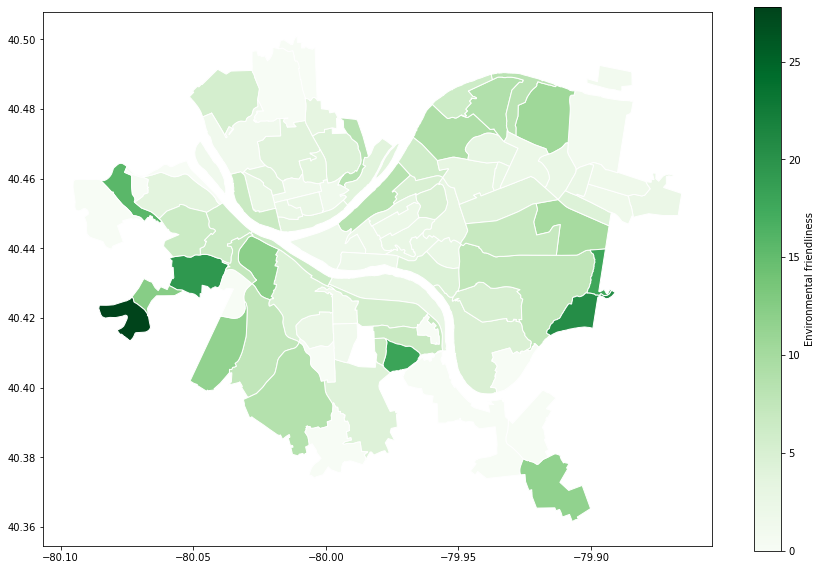

In [40]:
#plotting chloropleth map
combined.plot(column='totalratio', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Environmental friendliness"}, # label the legend
               figsize=(15, 10),         # set the size # set disctricts with no data to gray
               )

Conclusion Paragraphs:
<br/>
Ruchi: 
According to my personal notebook, the neighborhood with the largest ratio of trash cans to area is North Shore and the one with the least is Banksville. That is different from what the total ratio in the combined notebook tells us, however. That is because of the difference in the metric of my personal notebook and the combined noteboook. Overall, the metric of my personal one was only based off of one dataset so it did not take into consideration the other two datasets that we used in the combined. My personal metric was the number of trash cans per acre to get which neighborhood had the most trash cans and then that was added with the other two ratios to get a total ratio which weighed each metric equally. 

Dailynn:
According to my notebook, the neighborhood with the largest area cleaned to area ratio is Mount Washington and the least is Hazelwood. That is different to the other notebooks because of the metrics. My metric was using the dataset to find out which neighborhood was the cleanest by doing the area of the cleaning and dividing it by the total area of the neighborhood. Through that I was able to create the ratio and compare the neighborhoods.

Le Lin: 
According to the ratio of my personal data, the best neighborhood is Hays and the worst is Lincoln-Lemington-Belmar. My metric is the acre/frequency, so if the ratio is higher/lower than there are less/more fire incidents. The opposite way is frequency per acre, that means which has the highest/lowest the worst/best neighborhood. All of the conclusions are made based on my individual notebook. The Hays and Lincoln-Lemington-Belmor are the best/worst neighborhoods based on the frequency of fire incidents.

All three of our datasets required the use of the Neighborhoods dataset because depending on the area of the neighborhood it could have more or less fires, smart trash cans, and area cleaned. 